In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

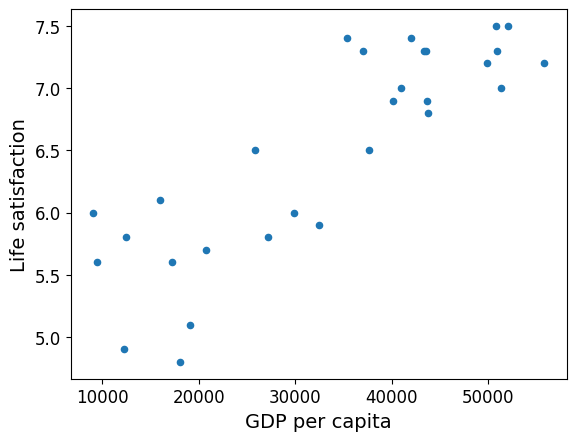

[[5.96242338]]


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [ ]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [ ]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(X.shape)
print(y.shape)

(29, 1)
(29, 1)


In [ ]:
print(X.size)

29


In [ ]:
print(y.size)

29


In [ ]:
type(np)

module

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(20, 1)
(20, 1)
(9, 1)
(9, 1)


In [ ]:
from sklearn.linear_model  import LinearRegression
im =LinearRegression()
im.fit(X_train,y_train)

LinearRegression()

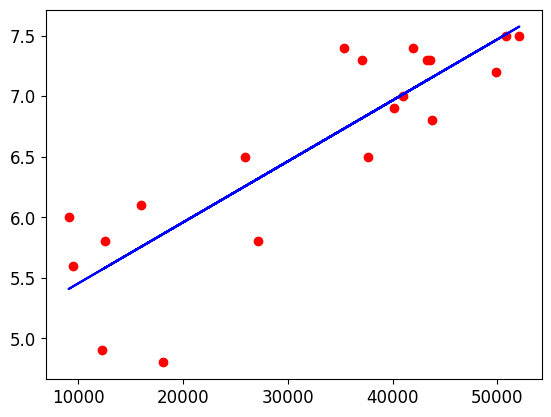

In [ ]:
plt.scatter(X_train,y_train, color ='red')
plt.plot(X_train,im.predict(X_train),color='blue')

In [ ]:
y_pred=im.predict(X_test)

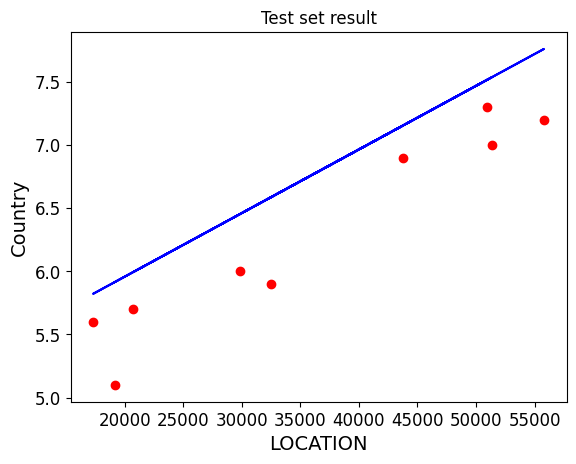

In [ ]:
plt.scatter(X_test,y_test, color ='red')
plt.plot(X_test,im.predict(X_test),color='blue')
plt.title('Test set result')
plt.xlabel('LOCATION')
plt.ylabel('Country')
plt.show()


In [ ]:
slope=im.coef_
intercept=im.intercept_,
print("Estimated model slope: ", slope)
print("Estimated model intercept:", intercept)

Estimated model slope:  [[5.03672641e-05]]
Estimated model intercept: (array([4.95055706]),)


In [ ]:
im.predict(X_new)

array([[6.08820245]])